In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# data loading
chunk_size = 1000
chunks=[]
for chunk in  pd.read_csv('weth.csv',chunksize=chunk_size):
    chunks.append(chunk.sample(frac=0.001 ))
df=pd.concat(chunks, axis=0)


In [6]:
df=df.apply(lambda x: x.replace(' ',np.nan))


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator,MissingIndicator,IterativeImputer,MissingIndicator


dtypes={'rain':float,'temp':float,'wetb':float,'dewpt':float,

        'vappr':float,'rhum':float,'msl':float,
        'wdsp':float,'wddir':float}#,'sun':float,'vis':float,'clht':float,'clamt':float}
df=df.astype(dtypes)

dfn=df.select_dtypes(include=['number'])

dfo=df.select_dtypes(include=[object]).drop(['sun','vis','clht','clamt'],axis=1)
df_na=df[['sun','vis','clht','clamt']]
it=IterativeImputer()
dfn=pd.DataFrame(it.fit_transform(dfn),columns=dfn.columns)

im=SimpleImputer(strategy='most_frequent')
imputed=im.fit_transform(dfo)
dfo=pd.DataFrame(imputed,columns=dfo.columns)


print(dfo.isnull().sum())
print(dfn.isnull().sum())
print(df_na.isnull().sum())

# for column in df.columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)
#df_na.head(2)

county     0
station    0
date       0
dtype: int64
latitude     0
longitude    0
rain         0
temp         0
wetb         0
dewpt        0
vappr        0
rhum         0
msl          0
wdsp         0
wddir        0
dtype: int64
sun      2817
vis      2860
clht     2817
clamt    2817
dtype: int64


In [7]:
dfo.head(2)

,county,station,date
0,Galway,ATHENRY,10-jul-2011 08:00
1,Galway,ATHENRY,11-sep-2011 12:00


In [8]:
dfo.isna().sum()

county     0
station    0
date       0
dtype: int64

In [9]:
print(dfn.columns)
df.head(1)

Index(['latitude', 'longitude', 'rain', 'temp', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'wdsp', 'wddir'],
      dtype='object')


,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
343,Galway,ATHENRY,53.289,-8.786,10-jul-2011 08:00,0.0,13.4,12.2,11.2,13.3,86.0,1018.4,2.0,200.0,NaN,NaN,NaN,NaN


In [10]:
df=pd.concat([dfo,dfn], axis=1)
df=df.reindex(columns=['date','county','station','latitude', 'longitude', 'rain', 'temp', 'wetb', 'dewpt', 'vappr',
    'rhum', 'msl', 'wdsp', 'wddir','sun','vis','clht','clamt'])
df=df.astype({'latitude':'category',
        'longitude':'category',
        'county':'category',
        'station':'category'})
df['date']=pd.to_datetime(df['date'],format="%d-%b-%Y %H:%M")
df.head(2)
print(df.isnull().sum())




date            0
county          0
station         0
latitude        0
longitude       0
rain            0
temp            0
wetb            0
dewpt           0
vappr           0
rhum            0
msl             0
wdsp            0
wddir           0
sun          4660
vis          4660
clht         4660
clamt        4660
dtype: int64


In [11]:
df=df.reset_index(drop=True)
print(df.memory_usage(deep=True).sum())
print(df.memory_usage(deep=True))
df.info()

df.head(5)

545944
Index          132
date         37280
county        6163
station       6897
latitude      5416
longitude     5416
rain         37280
temp         37280
wetb         37280
dewpt        37280
vappr        37280
rhum         37280
msl          37280
wdsp         37280
wddir        37280
sun          37280
vis          37280
clht         37280
clamt        37280
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660 entries, 0 to 4659
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4660 non-null   datetime64[ns]
 1   county     4660 non-null   category      
 2   station    4660 non-null   category      
 3   latitude   4660 non-null   category      
 4   longitude  4660 non-null   category      
 5   rain       4660 non-null   float64       
 6   temp       4660 non-null   float64       
 7   wetb       4660 non-null   float64       
 8   dewpt      4660 non-null   float64   

,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,2011-07-10 08:00:00,Galway,ATHENRY,53.289,-8.786,0.0,13.400000,12.200000,11.200000,13.300000,86.0,1018.400000,2.0,200.0,NaN,NaN,NaN,NaN
1,2011-09-11 12:00:00,Galway,ATHENRY,53.289,-8.786,0.1,10.066277,8.725879,7.223111,10.562082,83.0,1008.257409,17.0,220.0,NaN,NaN,NaN,NaN
2,2011-09-29 06:00:00,Galway,ATHENRY,53.289,-8.786,0.0,14.500000,13.700000,13.100000,15.100000,91.0,1015.800000,7.0,200.0,NaN,NaN,NaN,NaN
3,2011-11-02 07:00:00,Galway,ATHENRY,53.289,-8.786,0.0,13.700000,12.200000,10.900000,13.000000,83.0,989.000000,17.0,150.0,NaN,NaN,NaN,NaN
4,2012-01-03 10:00:00,Galway,ATHENRY,53.289,-8.786,0.1,5.500000,4.200000,2.300000,7.200000,79.0,994.400000,17.0,270.0,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()


date            0
county          0
station         0
latitude        0
longitude       0
rain            0
temp            0
wetb            0
dewpt           0
vappr           0
rhum            0
msl             0
wdsp            0
wddir           0
sun          4660
vis          4660
clht         4660
clamt        4660
dtype: int64

<Axes: >

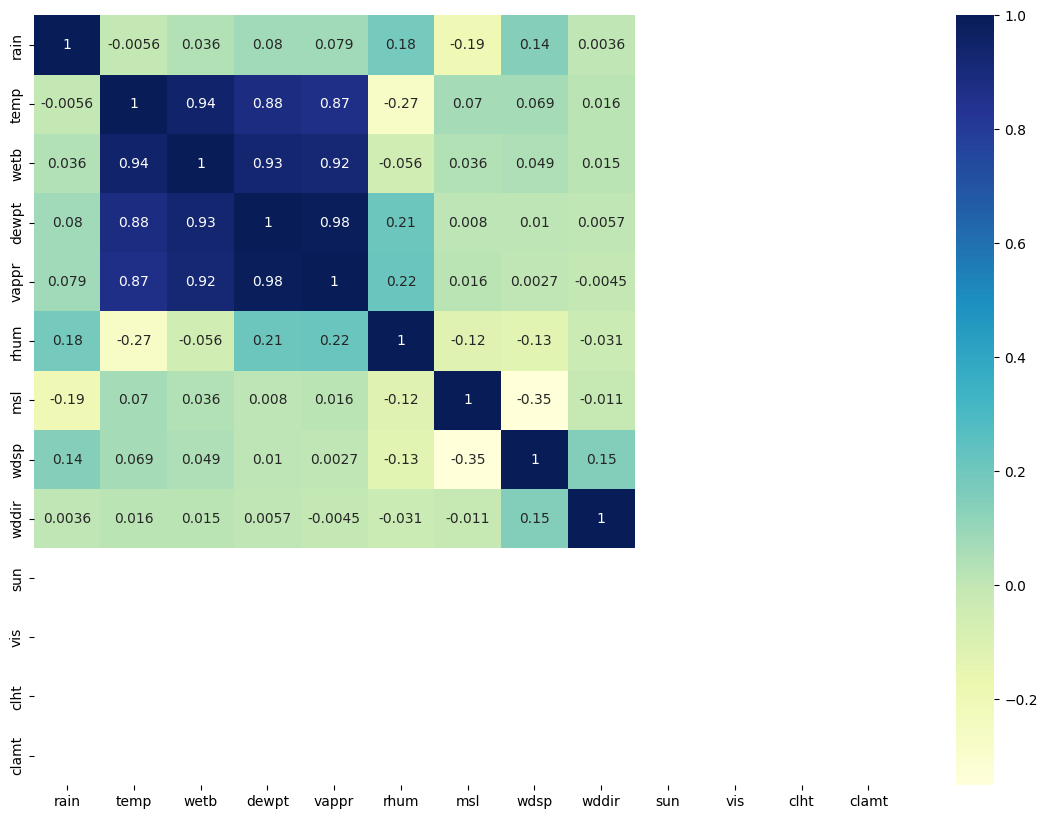

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='YlGnBu')

In [14]:
import folium
#import folium.map
#df=df.dropna()
df_uniq=df.drop_duplicates(['latitude','longitude'])

Ireland_map= folium.Map(location=[53.5,-8],zoom_start=6)

for _,row in df_uniq.iterrows():
    folium.Marker([row['latitude'],row['longitude']], popup=row['station']).add_to(Ireland_map)

Ireland_map

ModuleNotFoundError: No module named 'folium'

In [ ]:
df.head(2)

,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,2011-07-29 11:00:00,Galway,ATHENRY,53.289,-8.786,0.0,16.000000,12.800000,10.000000,12.200000,67.0,1025.500000,4.0,30.0,NaN,NaN,NaN,NaN
1,2011-09-11 14:00:00,Galway,ATHENRY,53.289,-8.786,0.0,10.526787,8.842817,6.917849,10.336894,79.0,1009.151033,17.0,230.0,NaN,NaN,NaN,NaN


In [ ]:
# create a new column for month
type(df['date'][3])
df=df.reset_index()
df['month']=df['date'].dt.month
df['year'] = df['date'].dt.year

#df['year'] = df['year'].astype('category')
#df['month'] = df['month'].astype('category')

In [ ]:
#labeling the counties and stations and 
from sklearn.preprocessing import LabelEncoder
df=df.drop(['sun','vis','clht','clamt'],axis=1)
lb=LabelEncoder()
to_label=['county','station']
for col in to_label:
    df[col]=lb.fit_transform(df[col])
df.head(2)



,index,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month,year
0,0,2011-07-29 11:00:00,6,0,53.289,-8.786,0.0,16.000000,12.800000,10.000000,12.200000,67.0,1025.500000,4.0,30.0,7,2011
1,1,2011-09-11 14:00:00,6,0,53.289,-8.786,0.0,10.526787,8.842817,6.917849,10.336894,79.0,1009.151033,17.0,230.0,9,2011


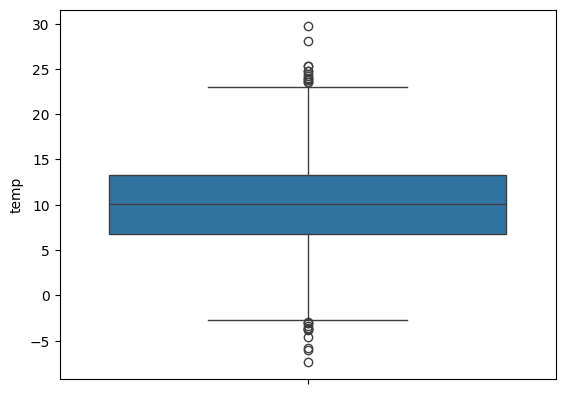

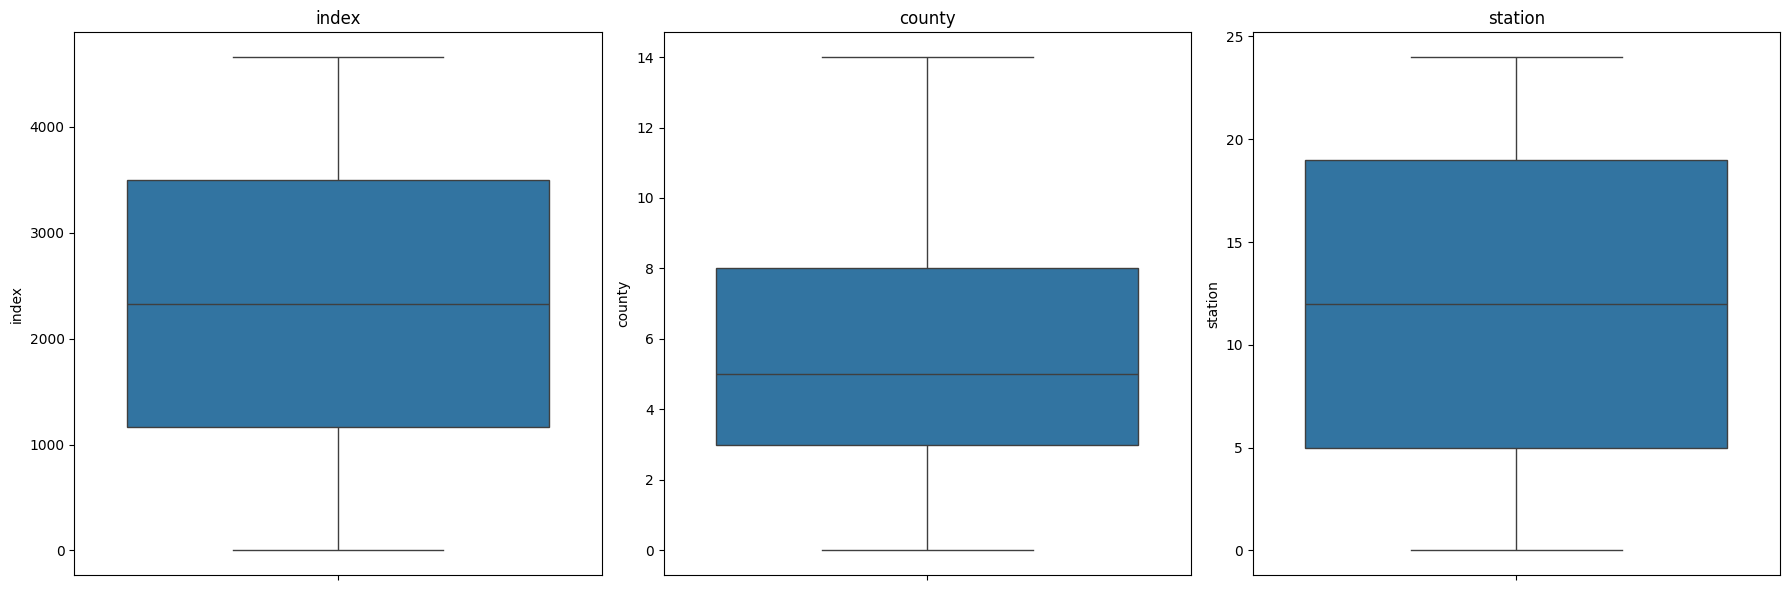

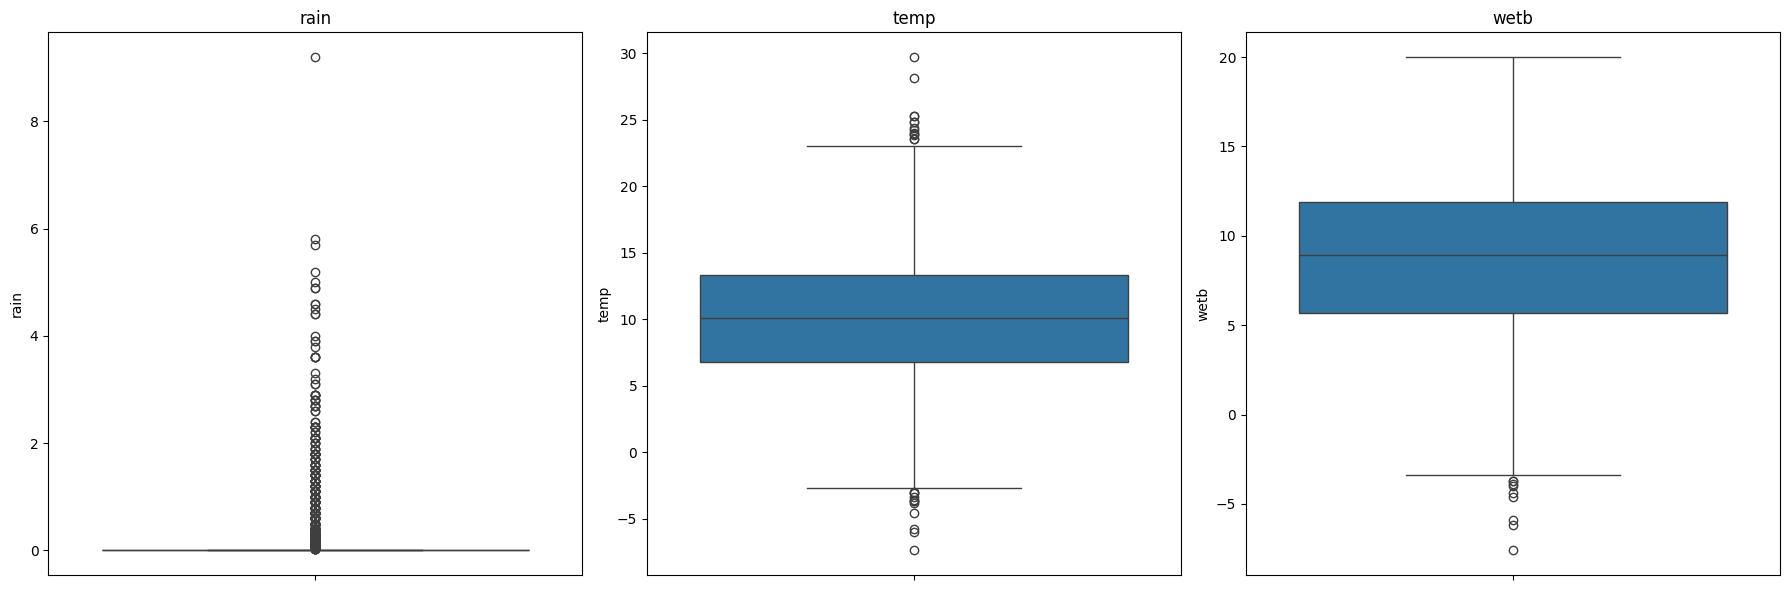

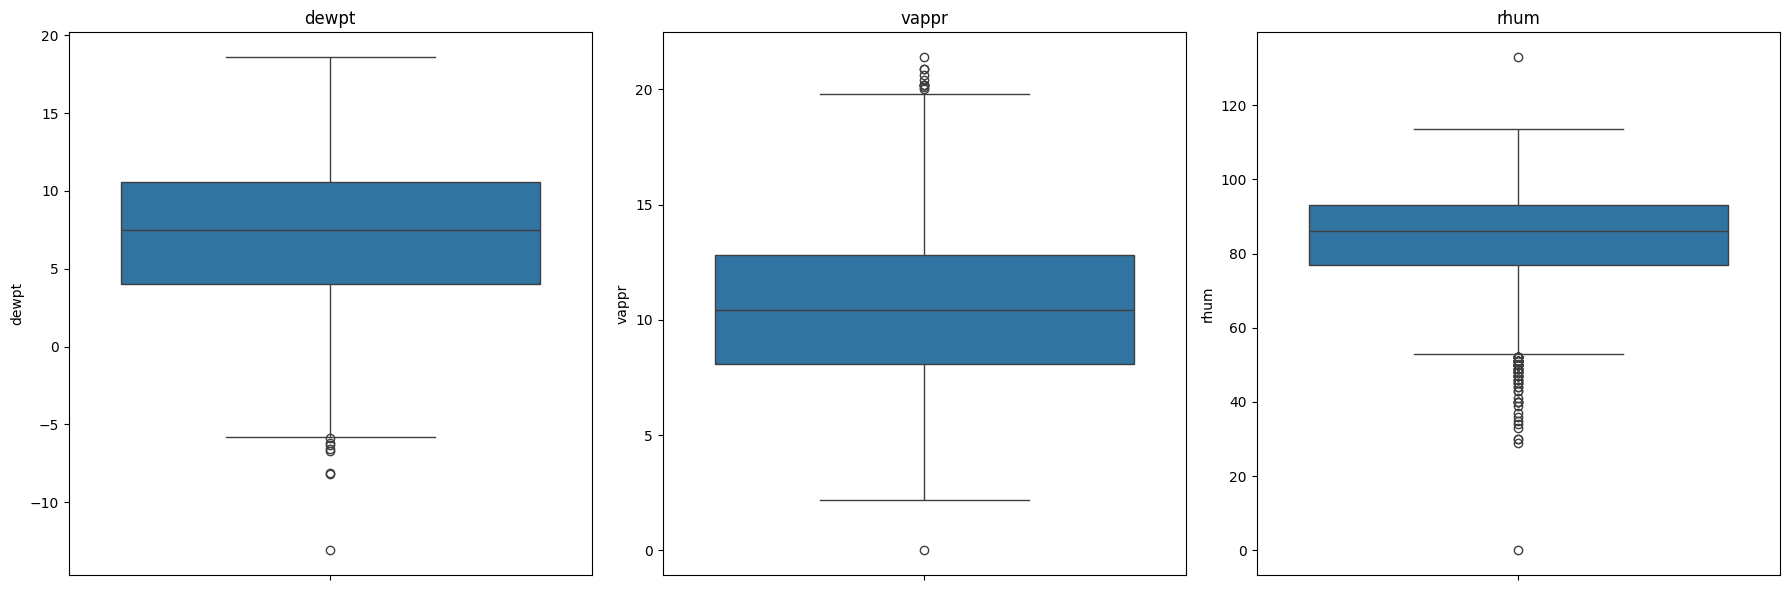

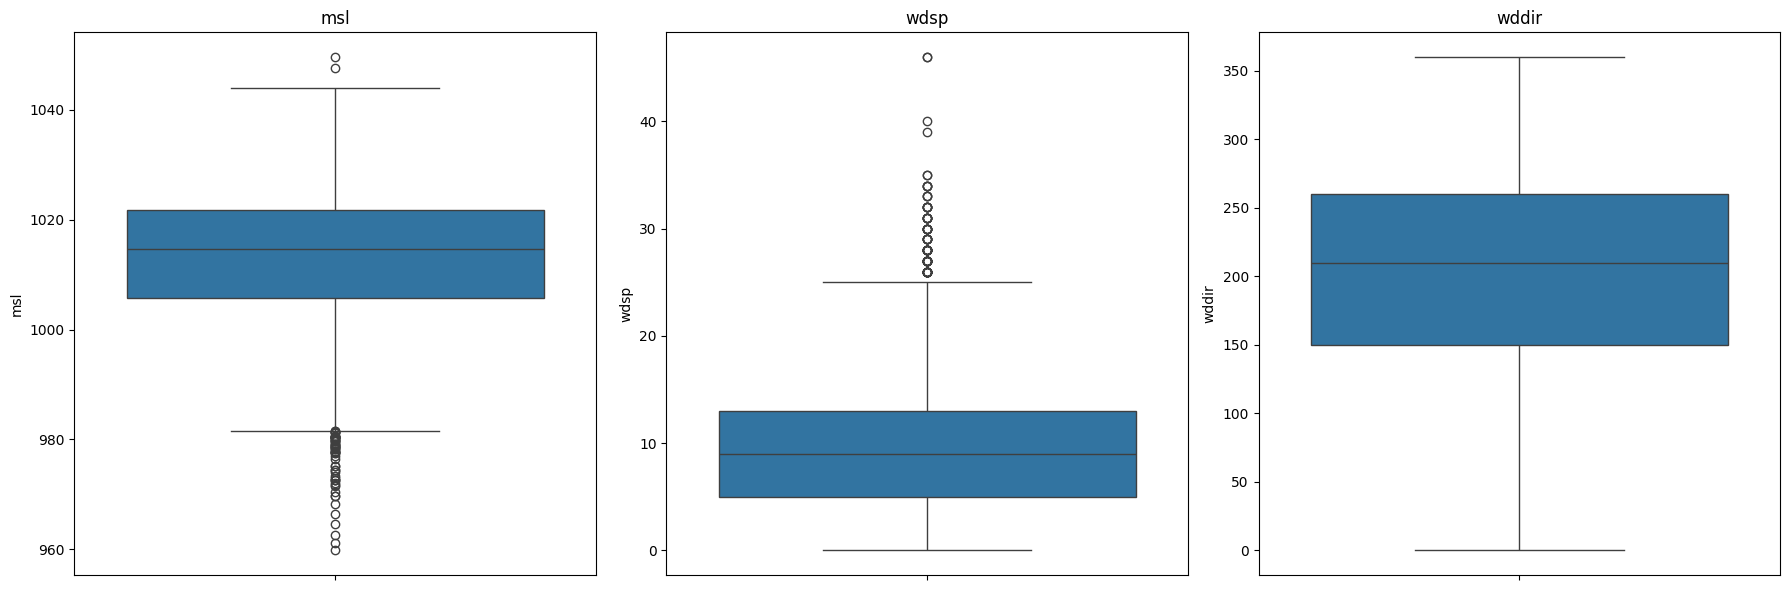

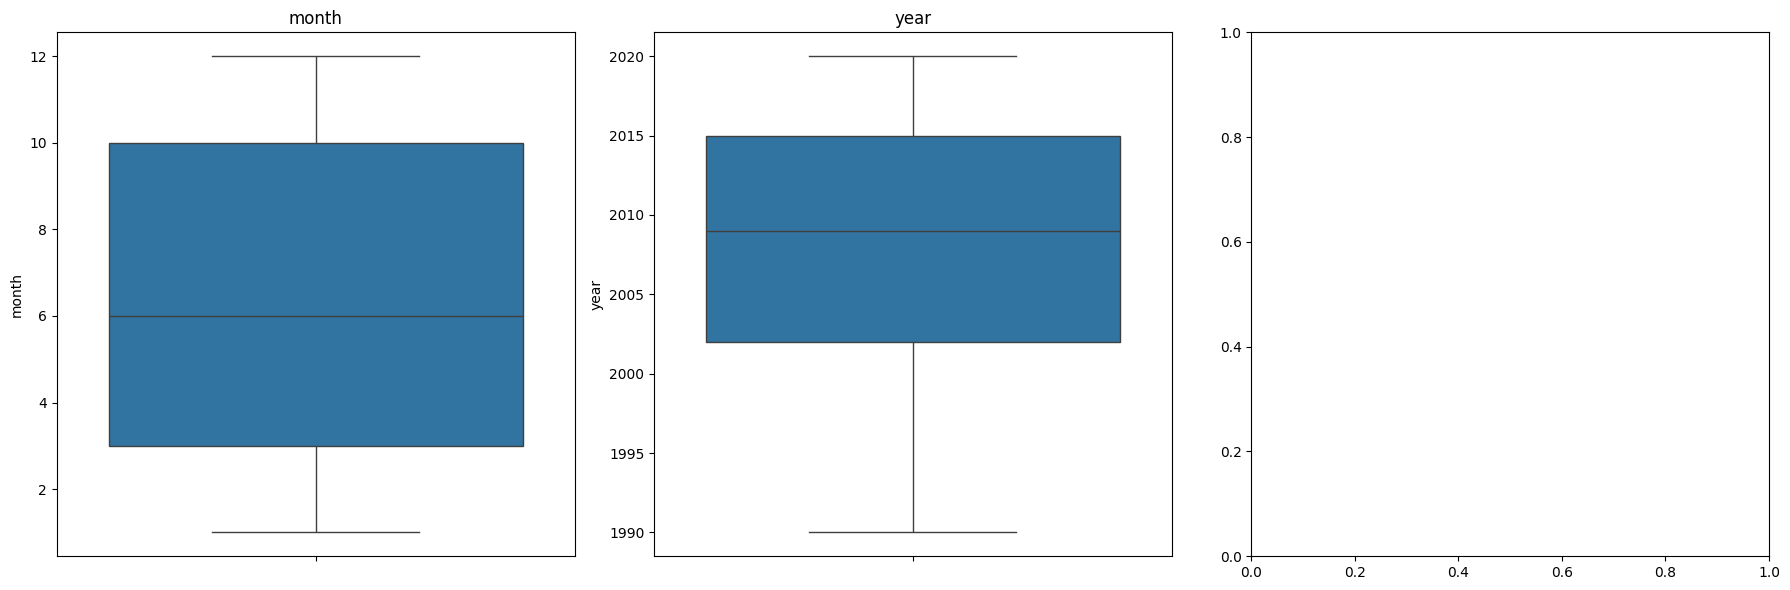

In [ ]:
df.loc[df['rain']<0,'rain']=0
df[df['rain']<0]

#np.log(df['rain']+1).plot(kind='hist',bins=10,figsize=(12,6),title='Rain distribution')
plt.show()
sns.boxplot(df['temp'])


def plots(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_plots = len(numeric_columns)
    
    for i in range(0, num_plots, 3):
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
        
        for j, ax in enumerate(axes):
            if i+j < num_plots:
                sns.boxplot(df[numeric_columns[i+j]], ax=ax)
                ax.set_title(numeric_columns[i+j])
        
        plt.tight_layout()
        plt.show()
plots(df)      

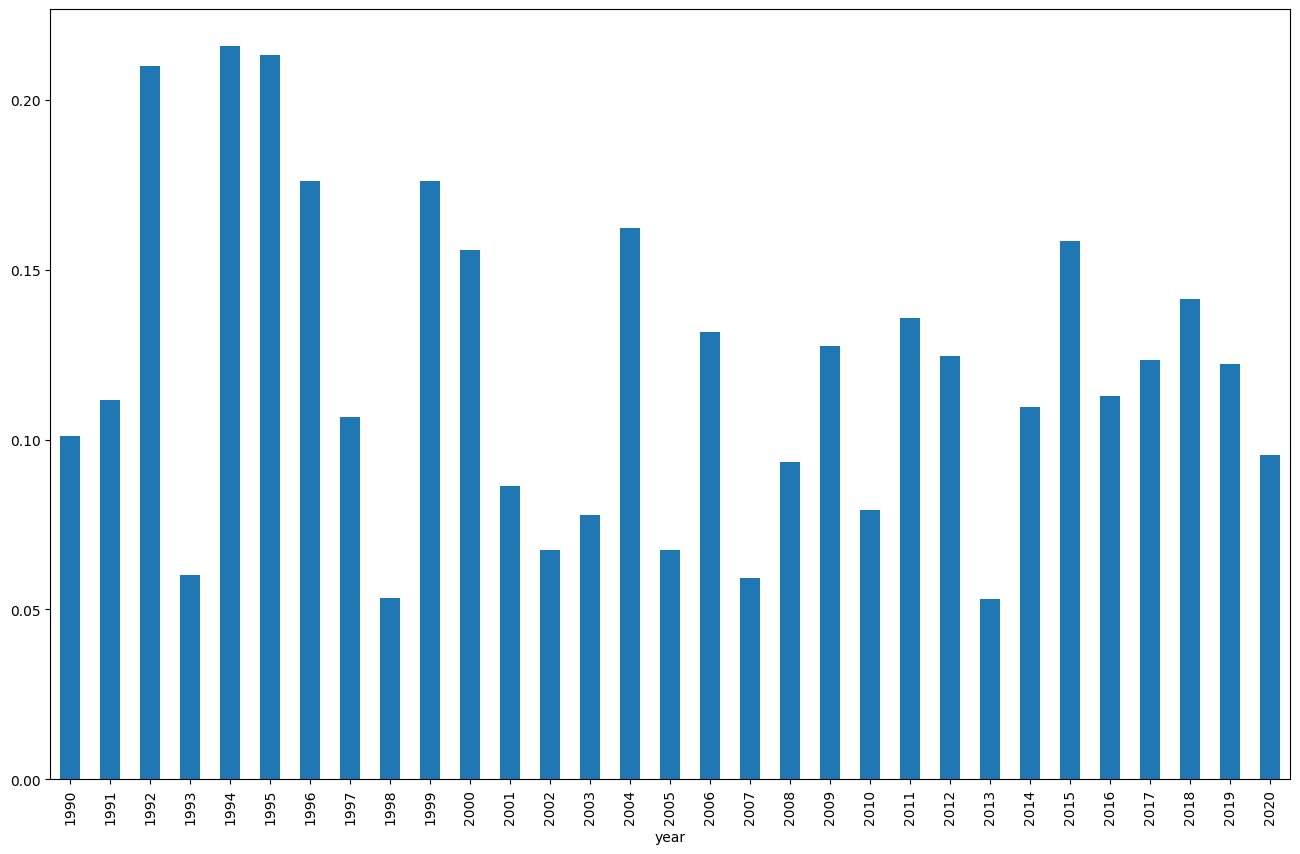

<Axes: xlabel='year'>

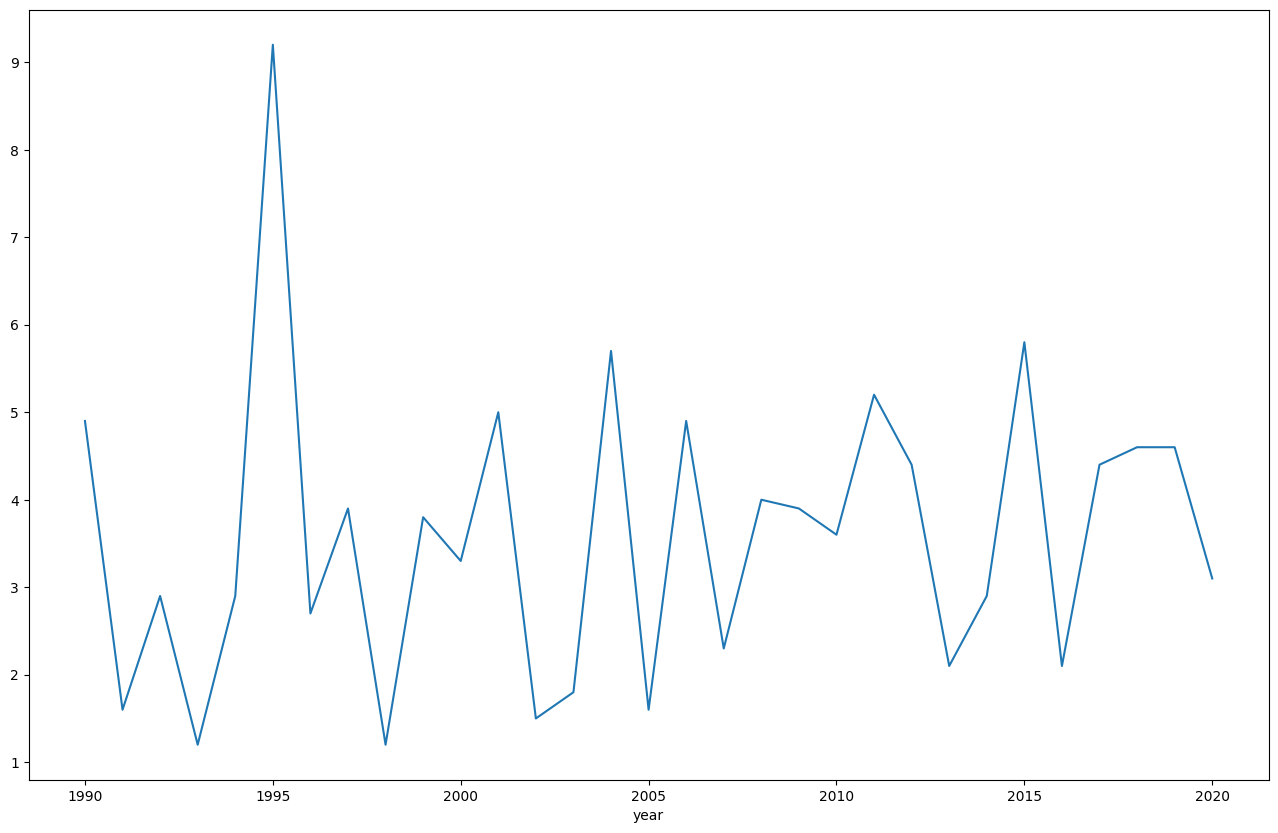

In [ ]:
df.groupby(['year'])['rain'].mean().plot(kind='bar',figsize=(16,10))
plt.show()
df.groupby(['year'])['rain'].max().plot(kind='line',figsize=(16,10))   

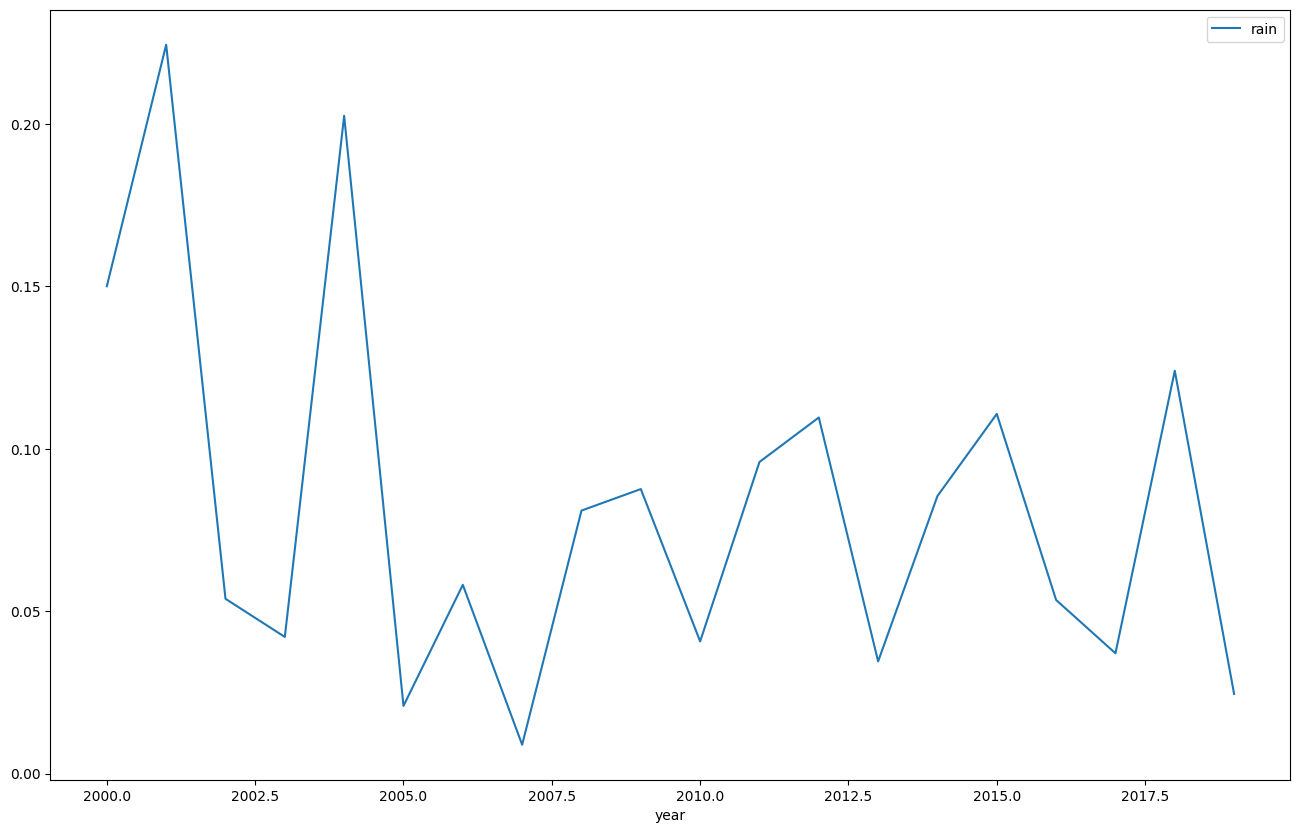

In [ ]:
df['temp'].describe()
# Define a function to map from month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create a new column 'season' by applying the function to the 'month' column
df['season'] = df['month'].apply(month_to_season)

# Count the number of each season
season_counts = df['season'].value_counts()
#df.groupby('season').aggregate({'rain': 'mean','temp':'mean','wetb':'mean'})#.plot(kind='bar',figsize=(16,10))

#df[df['year']>2000].groupby(['year','season']).aggregate({'rain': 'mean','temp':'mean','wetb':'mean'}).plot(kind='line',figsize=(16,10))
df_rain_summer=df[(df['year']>=2000) & (df['season']=='Summer')].groupby(['year']).aggregate({'rain': 'mean'}).plot(kind='line',figsize=(16,10))
#df_rain_summer.plot(kind='line',figsize=(16,10))

#sns.regplot(df_rain_summer.reset_index(),x='year',y='rain',scatter=False, color='red')

# Classification


In [ ]:
df.head(2)
df=df.set_index('date').drop(['index'],axis=1)


In [ ]:
en=LabelEncoder()
df['season']=en.fit_transform(df['season'])
df_class=df.drop(['latitude','longitude','year','season',],axis=1)
y=np.where(df_class['rain']!=0,1,0)

df_class.head(2)

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month
date,,,,,,,,,,,,
2011-07-29 11:00:00,6,0,0.0,16.000000,12.800000,10.000000,12.200000,67.0,1025.500000,4.0,30.0,7
2011-09-11 14:00:00,6,0,0.0,10.526787,8.842817,6.917849,10.336894,79.0,1009.151033,17.0,230.0,9


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

norm=MinMaxScaler()
df_norm=norm.fit_transform(df_class)
X=df_norm
#y=df['rained']
X=pd.DataFrame(df_norm,columns=df_class.columns).values
#X=df.drop('season',axis=1).values


In [ ]:
print(X.shape)

(4660, 12)


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=.3,random_state=1)

svc=SVC(kernel='rbf',gamma=.5)

rd=RandomizedSearchCV(svc,param_distributions={'C':[1,10,100,1000],'gamma':[1,.1,.01,.001,.0001]},cv=5,n_iter=10)
#svc.fit(X_train,y_train)
#y_pred=svc.predict(X_test)
#print("the Train Score :" ,svc.score(X_train,y_train))
#print("the Test Score :" ,svc.score(X_test,y_test))
rd.fit(X_train,y_train)
y_pred=rd.predict(X_test)


In [ ]:

print("the Train Score :" ,rd.score(X_train,y_train))
print("the Test Score :" ,rd.score(X_test,y_test))
print("#"*20,"best_params_","#"*20)
print(rd.best_params_)

print("#"*20,"best_scores","#"*20)
print(rd.best_score_)

print("#"*20,"best_estimator_","#"*20)
print(rd.best_estimator_)

print("#"*20,"best_index-","#"*20)
print(rd.best_index_)

#print("#"*20,"best_result_","#"*20)
#print(rd.cv_results_)

print("#"*20,"best_splits_","#"*20)
print(rd.n_splits_)

print("#"*20,"best_refit_time_","#"*20)
print(rd.refit_time_)

print("#"*20,"best_scoring_","#"*20)
print(rd.scoring)

print("#"*20,"best_verbose_","#"*20)
print(rd.verbose)

print("#"*20,"error_score_","#"*20)
print(rd.error_score)


the Train Score : 0.9987737584304108
the Test Score : 0.9985693848354793
#################### best_params_ ####################
{'gamma': 0.1, 'C': 1000}
#################### best_scores ####################
0.9987734758875977
#################### best_estimator_ ####################
SVC(C=1000, gamma=0.1)
#################### best_index- ####################
7
#################### best_splits_ ####################
5
#################### best_refit_time_ ####################
1.9594364166259766
#################### best_scoring_ ####################
None
#################### best_verbose_ ####################
0
#################### error_score_ ####################
nan


In [ ]:
%%time
svc=SVC(kernel='rbf',gamma=.1,C=1000)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("the Train Score :" ,svc.score(X_train,y_train))
print("the Test Score :" ,svc.score(X_test,y_test))


the Train Score : 0.9987737584304108
the Test Score : 0.9985693848354793
CPU times: user 2.03 s, sys: 4.12 ms, total: 2.03 s
Wall time: 2.03 s


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      0.99      1.00       243

    accuracy                           1.00      1398
   macro avg       1.00      1.00      1.00      1398
weighted avg       1.00      1.00      1.00      1398

[[1155    0]
 [   2  241]]


So now we can classify the weather. if have specific weather conditions then we can forcast if it's raining in this weather or not.
we consider a day with these conditions :
county        3.0
station      23.0
rain          0.1
temp         14.4
wetb         14.2
dewpt        14.1
vappr        16.0
rhum         97.0
msl        1017.8
wdsp         19.0
wddir       240.0
month         7.0



In [ ]:
df_class[df_class['rain']>.5]

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month
date,,,,,,,,,,,,
2017-11-05 02:00:00,6,0,0.6,5.2,4.6,3.8,8.0,90.0,1013.4,5.0,260.0,11
2019-11-03 01:00:00,6,0,0.7,10.2,10.0,9.7,12.0,96.0,978.8,6.0,300.0,11
2005-09-19 09:00:00,1,1,1.6,12.2,11.5,10.9,13.0,91.0,1017.2,10.0,170.0,9
2007-02-24 19:00:00,1,1,1.1,7.0,6.5,5.9,9.3,92.0,989.4,6.0,220.0,2
2007-11-30 10:00:00,1,1,1.9,9.0,8.9,8.7,11.3,98.0,995.9,7.0,260.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-24 11:00:00,7,24,3.9,12.7,12.2,11.8,13.8,94.0,996.4,29.0,250.0,10
2011-11-01 21:00:00,7,24,2.4,13.1,12.1,11.2,13.3,88.0,992.9,22.0,150.0,11
2013-12-29 15:00:00,7,24,2.1,10.3,9.9,9.6,11.9,95.0,1001.2,21.0,190.0,12


In [ ]:
value=df_class.loc['2007-11-30 10:00:00'].values  
#value=norm.transform([value])
value.shape

(12,)

In [ ]:
prediction=svc.predict([value])
print(prediction)


[0]


In [17]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


#weth=pd.read_csv('weth.csv',parse_dates=['date'],index_col='date')
chunk_size = 1000
chunks=[]
for chunk in  pd.read_csv('weth.csv',chunksize=chunk_size,parse_dates=['date'],index_col='date'):
    chunks.append(chunk.sample(frac=0.0001 ))
weth=pd.concat(chunks, axis=0)


weth.head(2)

,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,
2011-07-28 08:00:00,Galway,ATHENRY,53.289,-8.786,0.0,13.9,12.3,10.9,13.1,82,1027.7,6,340,NaN,NaN,NaN,NaN
2011-09-06 02:00:00,Galway,ATHENRY,53.289,-8.786,0.0,14.1,13.2,12.4,14.4,89,996.6,11,240,NaN,NaN,NaN,NaN


In [54]:
#weth.sort_index(inplace=True)
#data=weth[['temp']]
data.index = pd.to_datetime(data.index)
data.sort_index(inplace=True)
#data.sort_index()
data.head(5)
#data.tail(5)

,temp
date,
1990-01-03 23:00:00,7.1
1990-01-07 13:00:00,9.6
1990-01-08 19:00:00,9.7
1990-01-09 16:00:00,6.8
1990-01-13 16:00:00,8.8


<Axes: title={'center': 'Rain in Ireland'}, xlabel='date'>

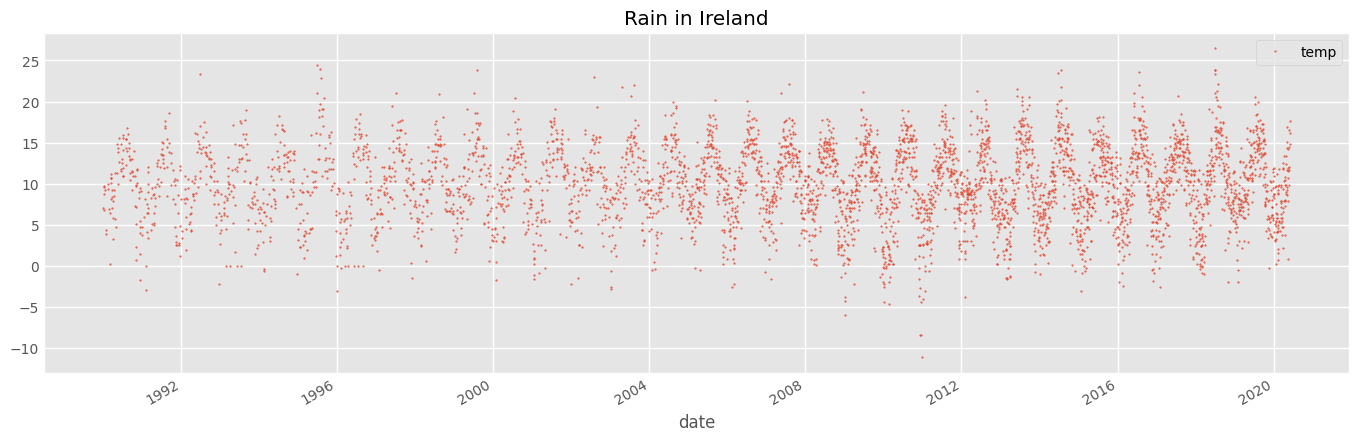

In [55]:

color_pallete=sns.color_palette()
# Convert all columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Now try plotting again
data.plot(style='.', figsize=(15,5), ms=1, color=color_pallete[0], title='Rain in Ireland')
#data.plot(style='.',figsize=(15,5),ms=1, color=color_pallete[0],title='Rain in Ireland')

In [65]:
from pandas.api.types import CategoricalDtype
import datetime
cat_type_months=CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
cat_type_days=CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],ordered=True)

def create_features(df,label=None):
    """Create time series features from datetime index

    
    """
    df=df.copy()
    df['date']=df.index
    df['hour']=df['date'].dt.hour
    df['dayofweek']=df['date'].dt.dayofweek
    df['weekday']=df['date'].dt.day_name()
    df['weekday']=df['weekday'].astype(cat_type_days)
    
    df['quarter']=df['date'].dt.quarter
    df['month']=df['date'].dt.month
    df['year']=df['date'].dt.year
    df['dayofyear']=df['date'].dt.dayofyear
    df['dayofmonth']=df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset']=(df.date.dt.month*100+df.date.dt.day-320)%1300
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall','Winter'])
    X=df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','weekday','season']]
    
    if label:
        y=df[label]
        return X,y
    return X


X,y=create_features(data,label='temp')
features_target=pd.concat([X,y],axis=1)
features_target.head(2)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,temp
date,,,,,,,,,,,
1990-01-03 23:00:00,23,2,1,1,1990,3,3,1,Wednesday,Winter,7.1
1990-01-07 13:00:00,13,6,1,1,1990,7,7,1,Sunday,Winter,9.6


<Axes: xlabel='year', ylabel='temp'>

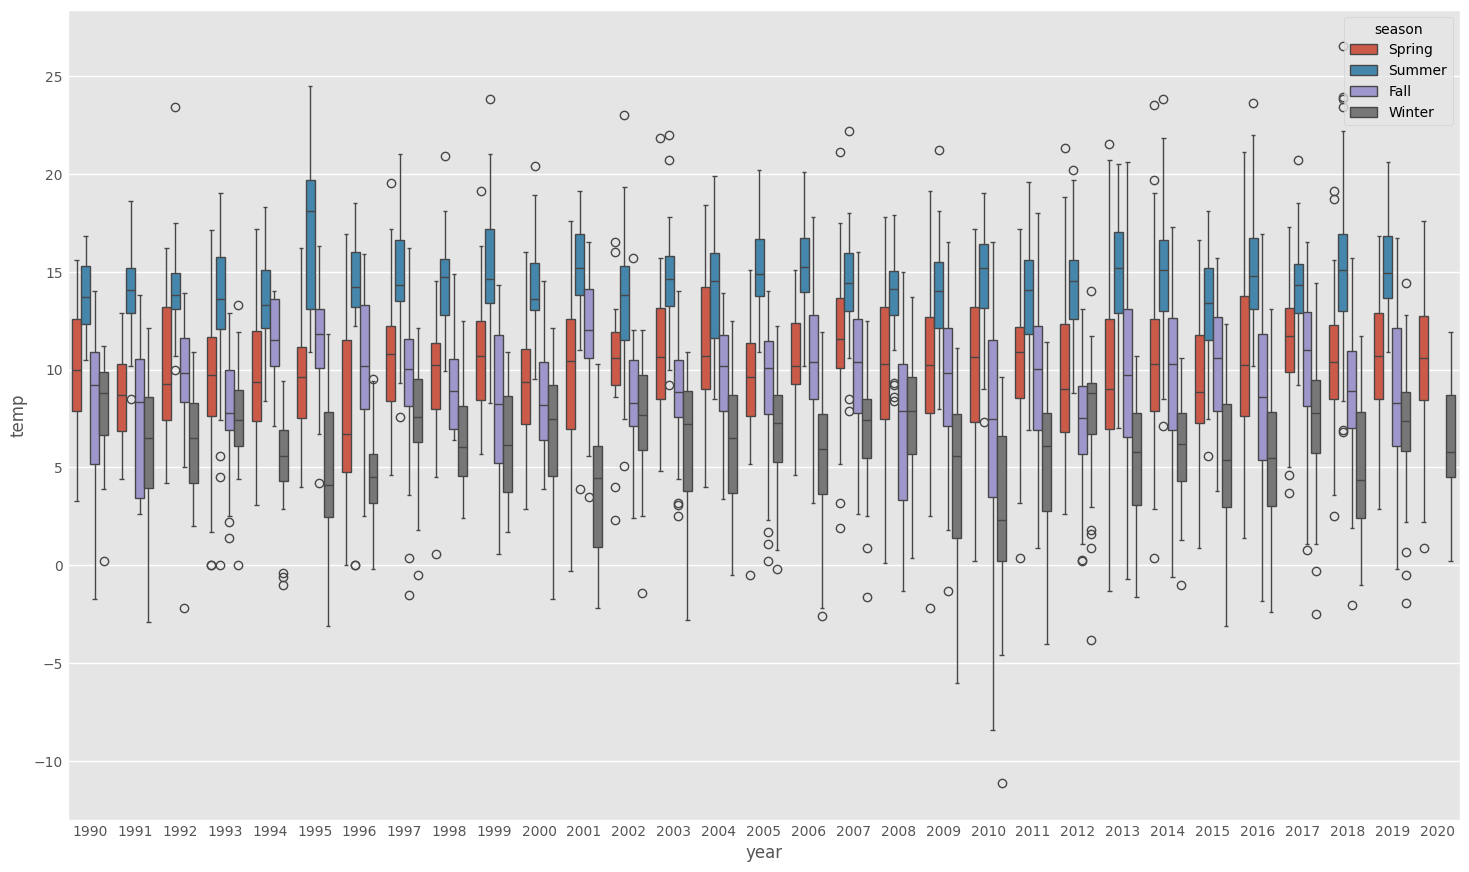

In [68]:
fig,ax=plt.subplots(figsize=(16,10))
sns.boxplot(data=features_target.dropna(),x='year',y='temp',ax=ax,hue='season',linewidth=1)

## Train Test Split

<Axes: title={'center': 'Temperature'}, xlabel='date'>

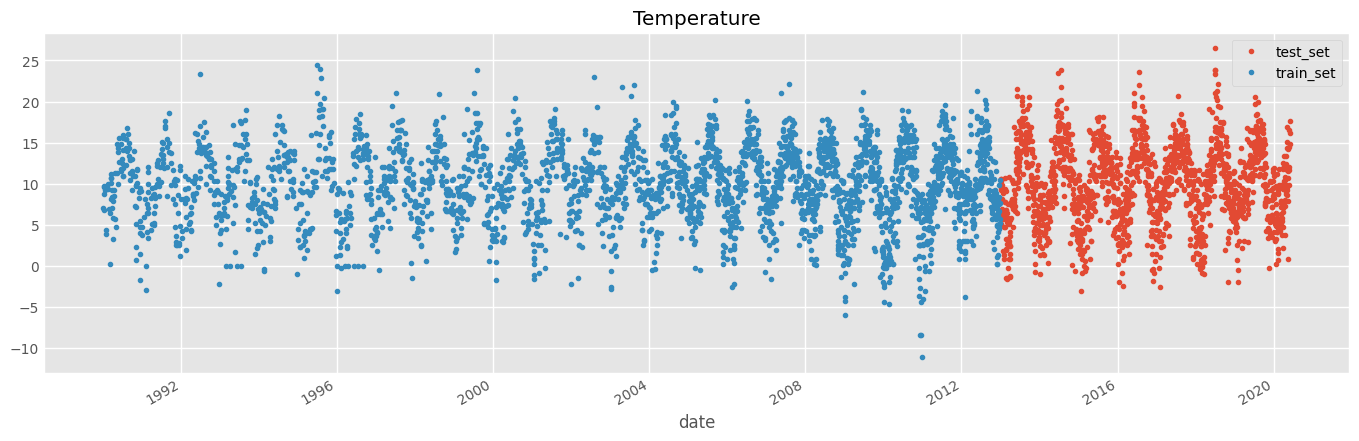

In [70]:
split_date='01-Jan-2013'
data_train=data.loc[data.index<split_date].copy()
data_test=data.loc[data.index>=split_date].copy()

data_test.rename(columns={'temp':'test_set'}).join(data_train.rename(columns={'temp':'train_set'}),how='outer').plot(figsize=(15,5),title='Temperature',style='.')

## Facebook Prophet Model

- date time column : ds
- targer: y


In [75]:
data_train_proph=data_train.reset_index().rename(columns={'date':'ds','temp':'y'})
data_train_proph.head(2)

,ds,y
0,1990-01-03 23:00:00,7.1
1,1990-01-07 13:00:00,9.6


In [77]:
%%time
model=Prophet()
model.fit(data_train_proph)

18:31:23 - cmdstanpy - INFO - Chain [1] start processing
18:31:24 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 283 ms, sys: 104 ms, total: 387 ms
Wall time: 1.36 s


In [79]:
data_test_proph=data_test.reset_index().rename(columns={'date':'ds','temp':'y'})
data_test_predicted=model.predict(data_test_proph)
data_test_predicted.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01 10:00:00,9.413601,2.213577,9.672771,9.413601,9.413601,-3.443211,-3.443211,-3.443211,0.732136,...,0.131907,0.131907,0.131907,-4.307254,-4.307254,-4.307254,0.0,0.0,0.0,5.970390
1,2013-01-01 14:00:00,9.413558,3.539032,10.914583,9.413558,9.413558,-2.090109,-2.090109,-2.090109,2.073863,...,0.147464,0.147464,0.147464,-4.311435,-4.311435,-4.311435,0.0,0.0,0.0,7.323449


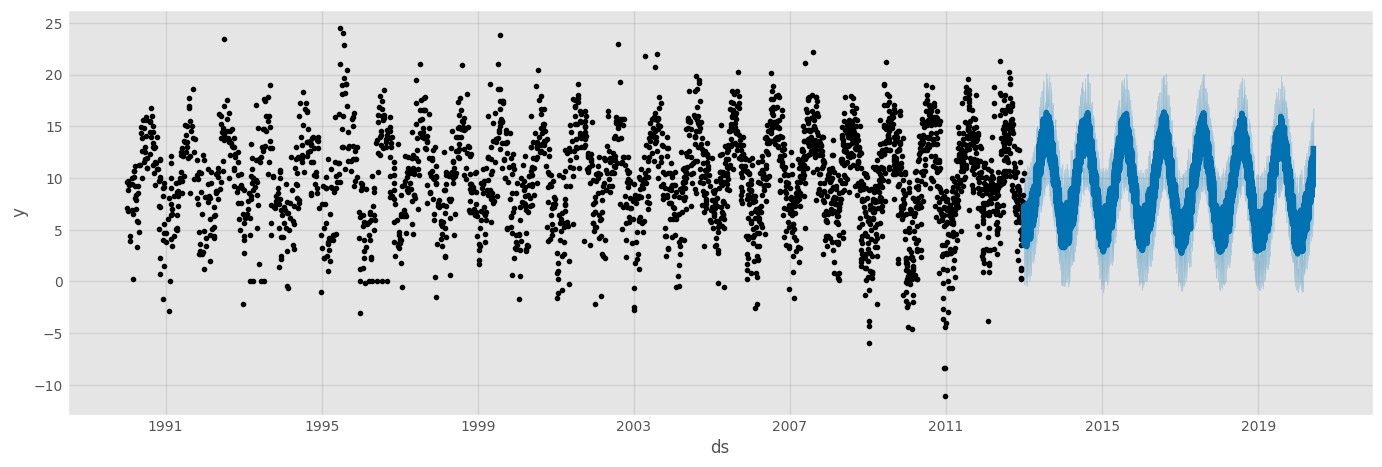

In [80]:
fig,ax=plt.subplots(figsize=(15,5))
fig=model.plot(data_test_predicted,ax=ax)

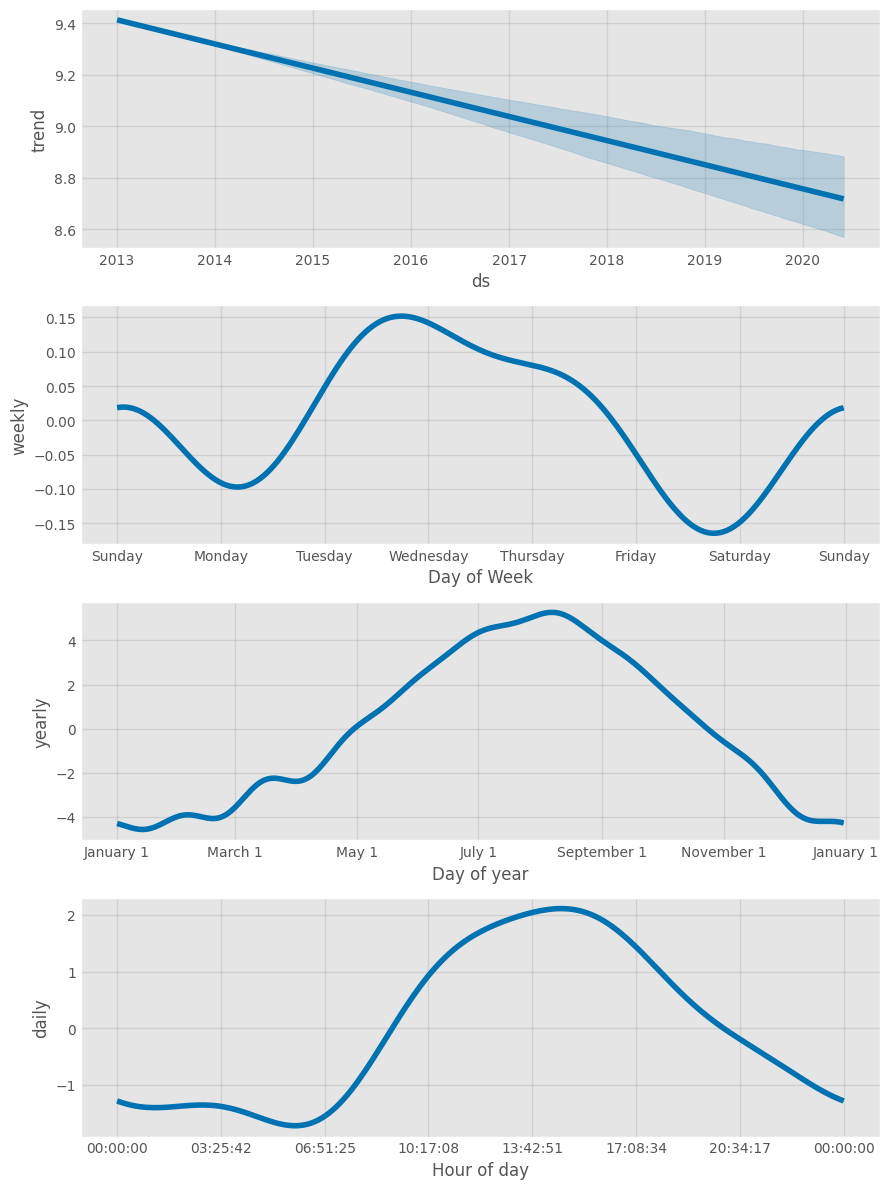

In [81]:
fig=model.plot_components(data_test_predicted)

## Compare the Forecasted with the Actual Values to Comapre

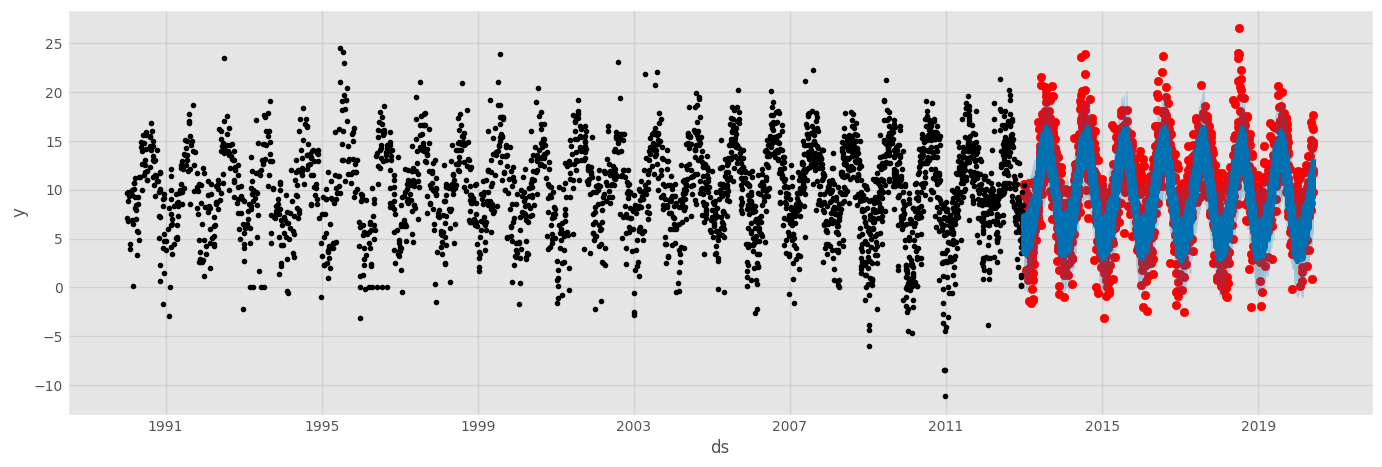

In [82]:
fig,ax= plt.subplots(figsize=(15,5))
ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

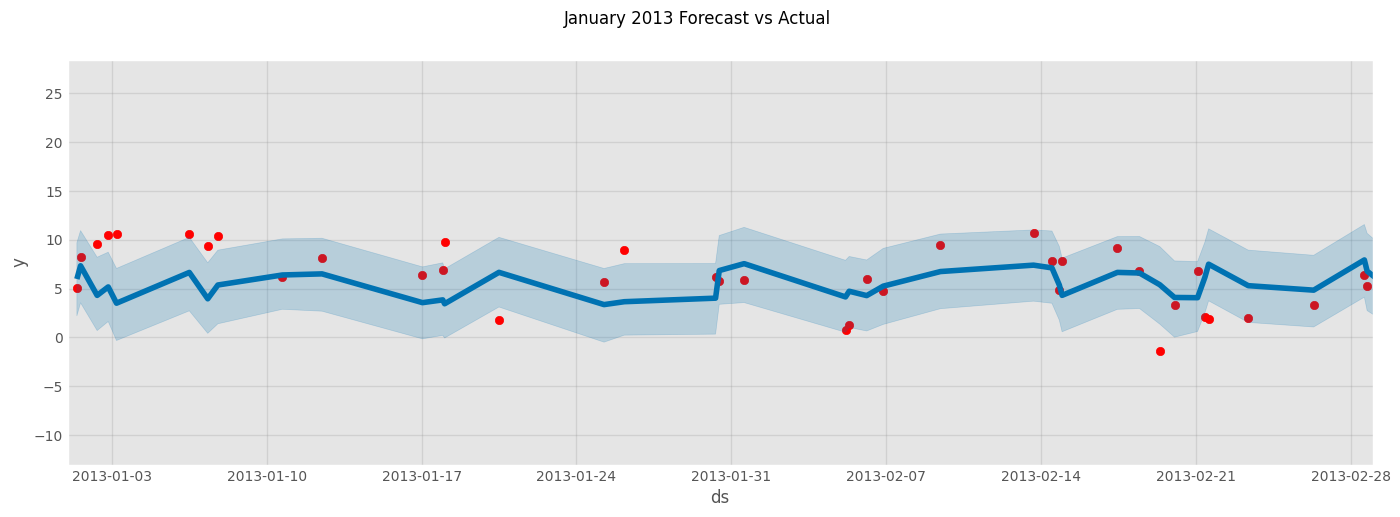

In [90]:
from datetime import datetime
fig,ax= plt.subplots(figsize=(15,5))

ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

lower_bound = datetime.strptime('01-Jan-2013', '%d-%b-%Y')
upper_bound = datetime.strptime('01-Mar-2013', '%d-%b-%Y')

ax.set_xbound(lower=lower_bound,upper=upper_bound)
plot= plt.suptitle('January 2013 Forecast vs Actual')

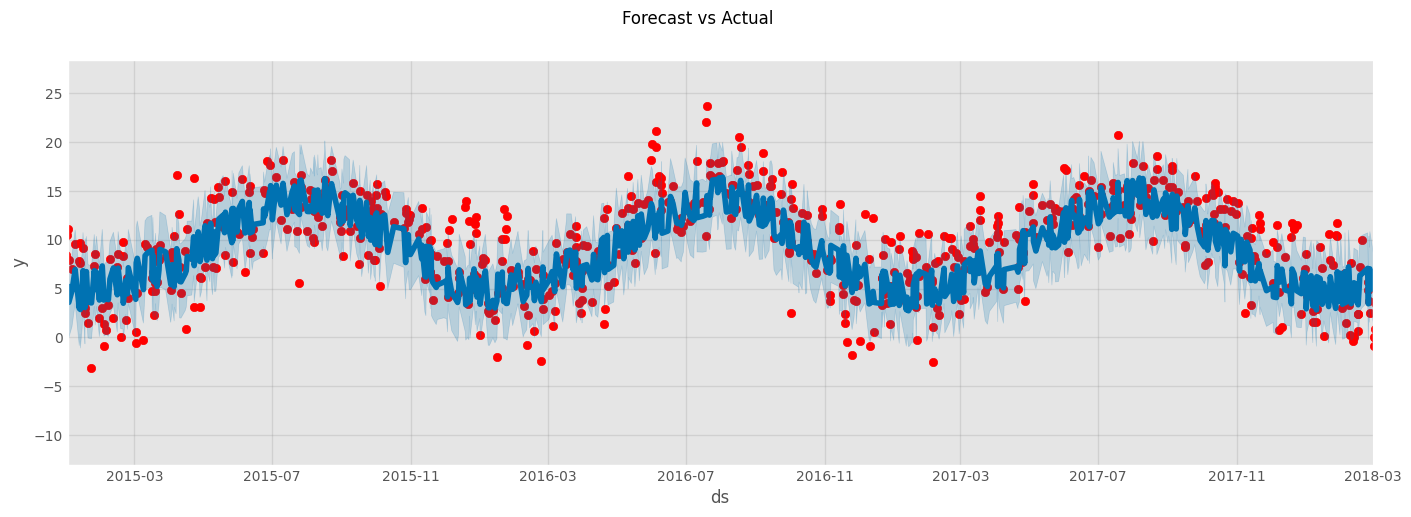

In [91]:
fig,ax= plt.subplots(figsize=(15,5))

ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

lower_bound = datetime.strptime('01-Jan-2015', '%d-%b-%Y')
upper_bound = datetime.strptime('01-Mar-2018', '%d-%b-%Y')

ax.set_xbound(lower=lower_bound,upper=upper_bound)
plot= plt.suptitle('Forecast vs Actual')

## Evaluate the model how good it is


In [92]:
np.sqrt(mean_squared_error(data_test['temp'],data_test_predicted['yhat']))

3.1572593196287846

In [93]:
mean_absolute_error(data_test['temp'],data_test_predicted['yhat'])


2.503848090616448

In [94]:
mean_absolute_percentage_error(data_test['temp'],data_test_predicted['yhat'])

inf

## Future Forcasting

In [100]:
future=model.make_future_dataframe(periods=12*35 ,freq='M',include_history=False)

forecast=model.predict(future)

forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-31 23:00:00,9.413719,0.167673,7.715915,9.413719,9.413719,-5.272468,-5.272468,-5.272468,-1.014515,...,0.038125,0.038125,0.038125,-4.296079,-4.296079,-4.296079,0.0,0.0,0.0,4.141251
1,2013-01-31 23:00:00,9.405749,0.639501,8.080606,9.405749,9.405749,-5.016745,-5.016745,-5.016745,-1.014515,...,-0.040028,-0.040028,-0.040028,-3.962202,-3.962202,-3.962202,0.0,0.0,0.0,4.389005
